## Problems

* Dataset only contains songs that are on top charts for 1 or more days; most songs never reach top charts, but not accounted for in dataset/model
* Vast majority of songs are on top charts for <=100 days


## Setup

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TopCharts_merged.csv', index_col = 0)
#dataset
data.head()

,Artist,Title,Id,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,4,159.801,5,0,0.129,0.585,0.520,0.1240,0.000070,116,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,4,143.950,8,0,0.291,0.556,0.538,0.0689,0.000000,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,4,180.064,4,1,0.381,0.664,0.667,0.6400,0.000001,496,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,4,123.146,6,1,0.492,0.630,0.804,0.2150,0.000000,702,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,4,81.967,5,1,0.127,0.665,0.498,0.2280,0.000000,178,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [3]:
len(data)

3431

In [4]:
data.isna().sum()

Artist                0
Title                 0
Id                   33
Time Signature        0
Tempo                 0
Key                   0
Mode                  0
Valence               0
Danceability          0
Energy                0
Acousticness          0
Instrumentalness      0
Days                  0
Artist Id             0
Artist Followers      0
Artist Popularity     0
Artist Genres         0
dtype: int64

In [5]:
df = data.copy()

In [6]:
y = df["Days"]
df.drop(columns = "Days", inplace = True)

In [7]:
d = ["Artist", "Title", "Id", "Artist Id", "Artist Genres"]
df.drop(columns = d, inplace = True)

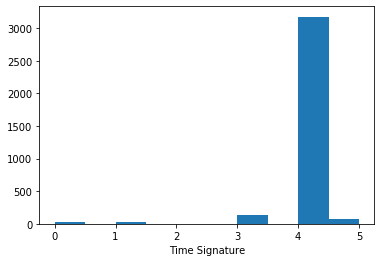

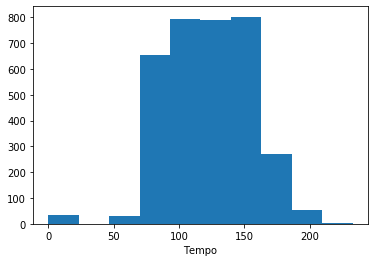

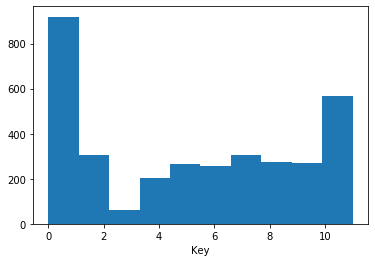

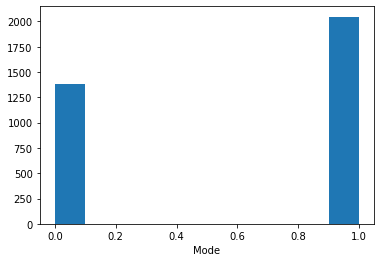

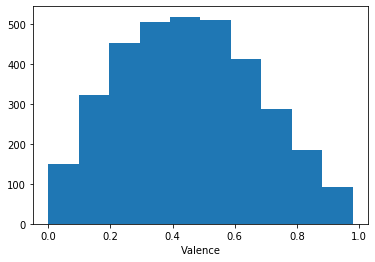

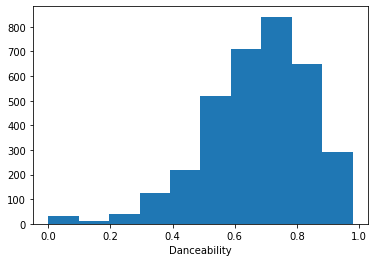

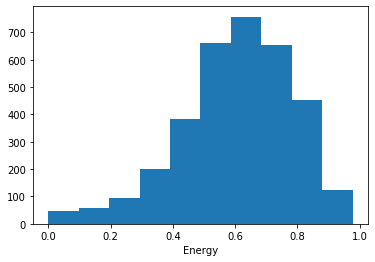

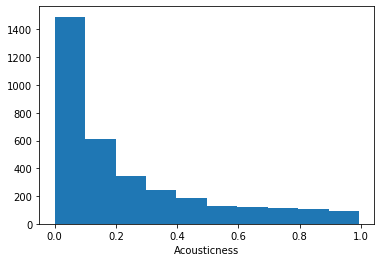

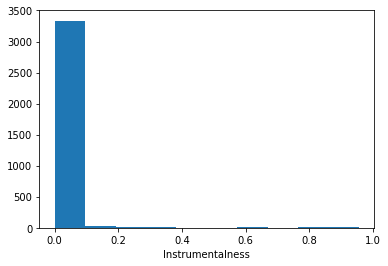

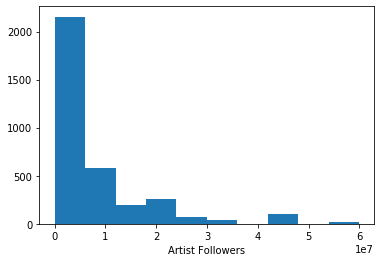

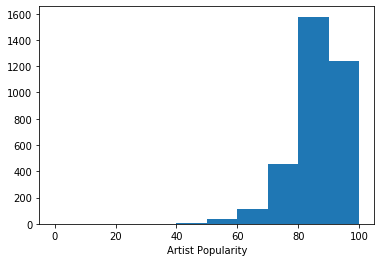

In [8]:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

(array([1.000e+00, 1.000e+00, 0.000e+00, 6.000e+00, 1.000e+01, 4.000e+01,
        1.730e+02, 6.740e+02, 1.753e+03, 7.730e+02]),
 array([ 0.69314718,  2.41469461,  4.13624204,  5.85778947,  7.57933691,
         9.30088434, 11.02243177, 12.7439792 , 14.46552663, 16.18707406,
        17.90862149]),
 <a list of 10 Patch objects>)

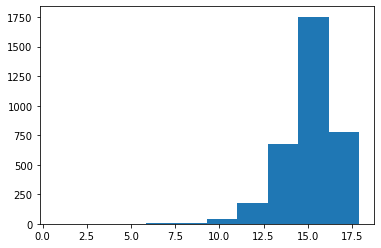

In [9]:
plt.hist(np.log(df["Artist Followers"]))

In [10]:
#can probably drop time sig and inst

df.drop(columns = ["Time Signature", "Instrumentalness"], inplace = True)

## Convert factor variables

In [11]:
categorical = ["Key", "Mode"]

In [12]:
df_dummy = df.copy()
for c in categorical:
    dummy = pd.get_dummies(df[c], prefix = c)
    df_dummy = pd.concat([df_dummy, dummy], axis = 1)    
df_dummy.drop(columns = categorical, inplace = True)

In [13]:
df_dummy.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Artist Followers,Artist Popularity,Key_0,Key_1,Key_2,...,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,22726049.0,98.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,22726049.0,98.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,22726049.0,98.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## log transform response variable

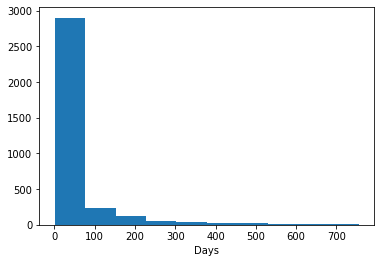

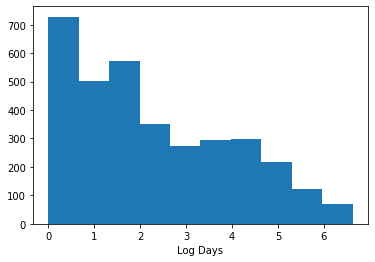

In [14]:
plt.hist(y)
plt.xlabel("Days")
plt.show()

plt.hist(np.log(y))
plt.xlabel("Log Days")
plt.show()

## Split train/test data

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
y = np.log(y)

In [17]:
X = df_dummy.copy()

In [18]:
X.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Artist Followers,Artist Popularity,Key_0,Key_1,Key_2,...,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,22726049.0,98.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,22726049.0,98.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,22726049.0,98.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Functions to evaluate model

In [20]:
from sklearn import metrics 

In [21]:
def evalModel(model, X_test = X_test, y_test = y_test, exp = True):
    y_pred = model.predict(X_test)
    if exp:
        y_pred_exp = np.exp(y_pred)
        y_test_exp = np.exp(y_test)
    
    scores = []
    for fn in [metrics.max_error, metrics.mean_absolute_error, metrics.median_absolute_error]:
        scores.append(fn(y_test_exp, y_pred_exp))
    
    plt.hist(y_test_exp - y_pred_exp)
    plt.xlabel("Actual - Predicted")
    return dict(zip(["max_error", "Mean AE", "Median AE"], scores))     

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
med_scorer = metrics.make_scorer(metrics.median_absolute_error, False)

In [24]:
def gridsearch(model, hyperparams, X_train, y_train):
    gs = GridSearchCV(estimator = model, verbose = 3, scoring = med_scorer, n_jobs = -1, param_grid = hyperparams).fit(X_train, y_train)
    return {"model": gs.best_estimator_, "params": gs.best_params_}

## Linear regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

(array([575.,  47.,  30.,   8.,  11.,   3.,   7.,   1.,   4.,   1.]),
 array([  1. ,  76.5, 152. , 227.5, 303. , 378.5, 454. , 529.5, 605. ,
        680.5, 756. ]),
 <a list of 10 Patch objects>)

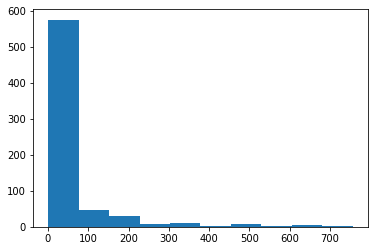

In [27]:
plt.hist(y_test_exp)

(array([ 73., 250., 195.,  93.,  32.,  12.,  13.,  10.,   4.,   5.]),
 array([ 2.05371123,  5.52480932,  8.99590741, 12.4670055 , 15.93810359,
        19.40920168, 22.88029977, 26.35139786, 29.82249595, 33.29359403,
        36.76469212]),
 <a list of 10 Patch objects>)

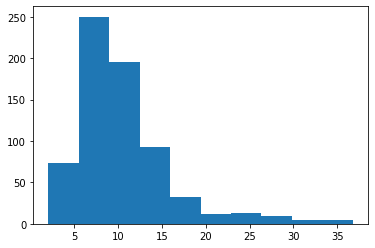

In [28]:
plt.hist(y_pred_exp)

{'max_error': 739.1695951855245,
 'Mean AE': 44.418120868454714,
 'Median AE': 8.341163564478776}

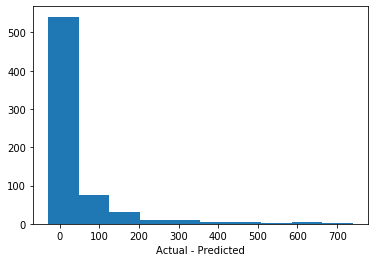

In [29]:
evalModel(regressor, X_test, y_test, exp = True)

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

{'max_error': 690.139944566633,
 'Mean AE': 43.44073524534639,
 'Median AE': 7.838323917419094}

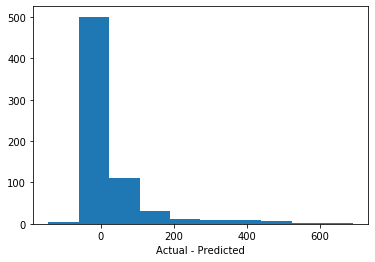

In [31]:
rf = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train)
evalModel(rf)

In [32]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
params = {"max_depth":np.arange(10,100,10), "max_leaf_nodes":np.arange(10, 100, 10)}
cv1 = gridsearch(RandomForestRegressor(), params, X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.3min finished


In [34]:
cv1['params']

{'max_depth': 40, 'max_leaf_nodes': 90}

{'max_error': 698.3928044493358,
 'Mean AE': 42.82364041115945,
 'Median AE': 7.140382204929656}

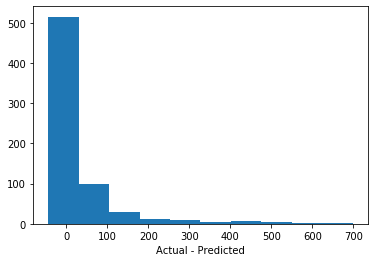

In [35]:
evalModel(cv1['model'])

## Try transforming non-normal predictors

In [36]:
from scipy.stats import boxcox

In [37]:
df2 = pd.concat([df_dummy, y], axis = 1)

In [38]:
df2 = df2[df2["Artist Popularity"] != 0] #drop rows where popularity is 0

In [39]:
y2 = df2["Days"]
df2.drop(columns = "Days", inplace = True)

In [40]:
df2.loc[:,"Artist Popularity"] = boxcox(df2["Artist Popularity"])[0]
df2.loc[:,"Artist Followers"] = boxcox(df2["Artist Followers"])[0]

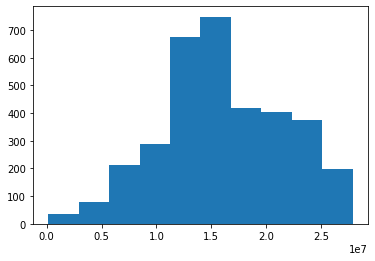

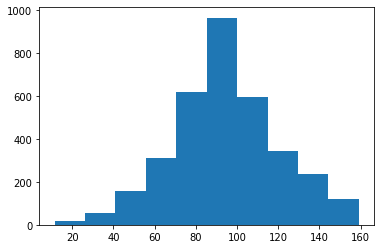

In [41]:
plt.hist(df2["Artist Popularity"])
plt.show()

plt.hist(df2["Artist Followers"])
plt.show()

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y2, test_size=0.2, random_state=0)

{'max_error': 738.3844831744527,
 'Mean AE': 44.73176479337934,
 'Median AE': 8.832836600062032}

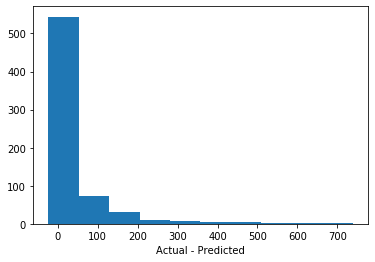

In [43]:
regressor2 = LinearRegression().fit(X2_train, y2_train)
evalModel(regressor2, X2_test, y2_test)

{'max_error': 703.9803303961916,
 'Mean AE': 43.997843428456825,
 'Median AE': 8.330628045216923}

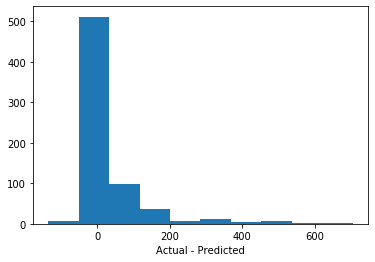

In [44]:
rf2 = RandomForestRegressor(n_jobs = -1).fit(X2_train, y2_train)
evalModel(rf2, X2_test, y2_test)

In [45]:
params = {"max_depth":np.arange(10,100,10), "max_leaf_nodes":np.arange(10, 100, 10)}
cv = gridsearch(RandomForestRegressor(n_jobs = -1), params, X2_train, y2_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.2min finished


{'max_depth': 30, 'max_leaf_nodes': 90}


{'max_error': 749.3966642242644,
 'Mean AE': 44.6389771416475,
 'Median AE': 5.982195641316389}

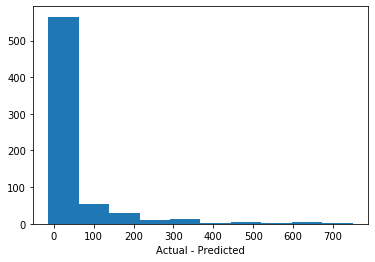

In [46]:
print(cv['params'])
evalModel(cv['model'])

## Lasso

In [47]:
from sklearn.linear_model import Lasso

{'max_error': 753.138810100417,
 'Mean AE': 45.5534734479353,
 'Median AE': 4.21023309864046}

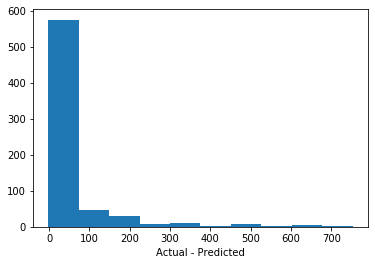

In [48]:
lasso = Lasso().fit(X2_train, y2_train)
evalModel(lasso)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 2}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


{'max_error': 753.207804957111,
 'Mean AE': 45.558117697109466,
 'Median AE': 4.211766200531417}

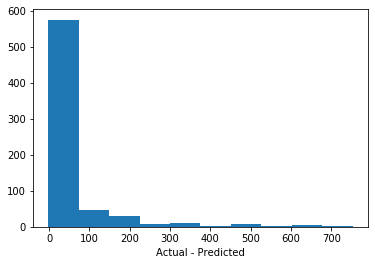

In [49]:
params = {"alpha":np.arange(1, 11,1)}
cv = gridsearch(Lasso(), params, X2_train, y2_train)
print(cv['params'])
evalModel(cv['model'])

## ElasticNet

In [50]:
from sklearn.linear_model import ElasticNet

{'max_error': 756.0000000000002,
 'Mean AE': 47.43316366771919,
 'Median AE': 6.999999999999999}

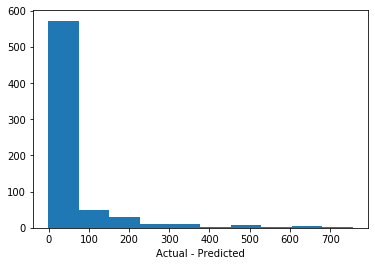

In [51]:
en = ElasticNet().fit(X2_train, y2_train)
evalModel(en)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.4s


{'alpha': 4.5, 'l1_ratio': 0.30000000000000004}


[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    5.2s finished


{'max_error': 753.1632979247487,
 'Mean AE': 45.55519867240809,
 'Median AE': 4.210773056317366}

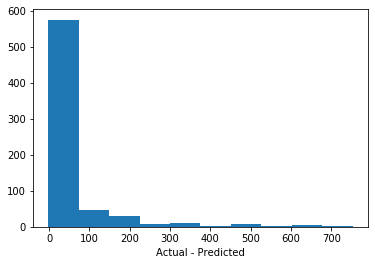

In [52]:
params = {"alpha":np.arange(1, 11, .5), "l1_ratio":np.arange(0,1.1,.1)}
cv = gridsearch(ElasticNet(), params, X2_train, y2_train)
print(cv['params'])
evalModel(cv['model'])

In [73]:
more = data[data.Days >= 365]
len(more)

85

In [76]:
pm = data[data.Artist == "Post Malone"]
len(pm)

43

(array([17., 13.,  5.,  0.,  0.,  1.,  2.,  0.,  3.,  2.]),
 array([  3. ,  78.3, 153.6, 228.9, 304.2, 379.5, 454.8, 530.1, 605.4,
        680.7, 756. ]),
 <a list of 10 Patch objects>)

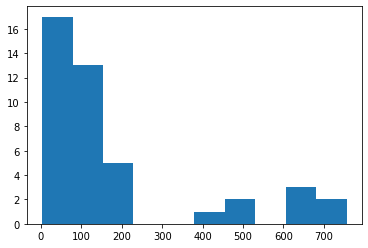

In [78]:
plt.hist(pm.Days)

In [71]:
print(more.Artist.value_counts())

Post Malone               8
XXXTENTACION              6
Khalid                    5
Juice WRLD                4
Billie Eilish             4
Ariana Grande             3
Travis Scott              3
Drake                     3
Lil Skies                 3
Dan + Shay                2
Kendrick Lamar            2
Imagine Dragons           2
Lil Baby                  2
A Boogie Wit da Hoodie    2
21 Savage                 2
J. Cole                   2
Kodak Black               1
BlocBoy JB                1
Lauv                      1
Panic! At The Disco       1
Flipp Dinero              1
H.E.R.                    1
Lady Gaga                 1
Ski Mask The Slump God    1
5 Seconds of Summer       1
Tyga                      1
benny blanco              1
Halsey                    1
Lil Uzi Vert              1
Joji                      1
Bebe Rexha                1
YNW Melly                 1
Rich The Kid              1
NF                        1
Meek Mill                 1
Mustard             

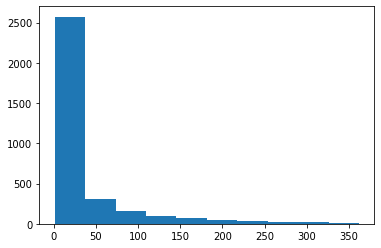

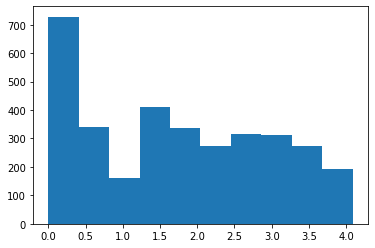

In [75]:
plt.hist(data[data.Days <365].Days)
plt.show()

plt.hist(boxcox(data[data.Days <365].Days)[0])
plt.show()